<a href="https://colab.research.google.com/github/akd3070/Botiot10/blob/main/Bot_iot10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/UNSW_2018_IoT_Botnet_Final_10_Best.csv"

In [4]:
df = pd.read_csv(path, delimiter=';')

<ipython-input-4-e8f33bf6516e>:1: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=';')


In [5]:
df = df.drop(df.columns[:2], axis=1)

In [6]:
df.head()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [7]:
df.tail()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
3668517,tcp,192.168.100.150,35064,192.168.100.3,22,81,0.000000,19,0.013165,1,0.013165,19,151.917969,151.917969,0.013165,1,Theft,Keylogging
3668518,tcp,192.168.100.150,35066,192.168.100.3,22,82,0.000000,19,0.000574,1,0.000574,19,3484.320557,3484.320557,0.000574,1,Theft,Keylogging
3668519,tcp,192.168.100.150,35070,192.168.100.3,22,84,0.000000,19,2.874302,6,2.874302,19,5.566569,4.522837,2.874302,1,Theft,Keylogging
3668520,tcp,192.168.100.3,43001,192.168.100.150,4433,85,0.000000,3,0.000003,1,0.000003,1,0.000000,0.000000,0.000003,1,Theft,Keylogging
3668521,arp,192.168.100.3,-1,192.168.100.149,-1,10,0.000056,3,0.000080,2,0.000145,2,0.008255,0.008255,0.000272,1,Theft,Keylogging


In [8]:
df.keys()

Index(['proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [9]:
print(df['category'].nunique())

5


In [10]:
print(df['category'].unique())

['DoS' 'DDoS' 'Normal' 'Reconnaissance' 'Theft']


In [11]:
df.dropna(subset=['category'], inplace=True)

In [12]:
print(df['category'].value_counts())    

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64


In [13]:
print(df['subcategory'].value_counts())   

UDP                  1981230
TCP                  1593180
Service_Scan           73168
OS_Fingerprint         17914
HTTP                    2474
Normal                   477
Keylogging                73
Data_Exfiltration          6
Name: subcategory, dtype: int64


In [14]:
label_encoder = LabelEncoder()
label_encoder.fit(df['proto'])
df['proto'] = label_encoder.transform(df['proto'])

In [15]:
label_encoder = LabelEncoder()
label_encoder.fit(df['saddr'])
df['saddr'] = label_encoder.transform(df['saddr'])

In [16]:
label_encoder = LabelEncoder()
label_encoder.fit(df['daddr'])
df['daddr'] = label_encoder.transform(df['daddr'])

In [17]:
print(df['category'].unique())

['DoS' 'DDoS' 'Normal' 'Reconnaissance' 'Theft']


In [18]:
label_mapping = {
    'DoS': 1,
    'DDoS': 2,
    'Normal': 3,
    'Reconnaissance': 4,
    'Theft': 5}

In [19]:
df['category'] = df['category'].map(label_mapping)

In [20]:
print(df['category'].unique())

[1 2 3 4 5]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   proto              int64  
 1   saddr              int64  
 2   sport              object 
 3   daddr              int64  
 4   dport              object 
 5   seq                int64  
 6   stddev             float64
 7   N_IN_Conn_P_SrcIP  int64  
 8   min                float64
 9   state_number       int64  
 10  mean               float64
 11  N_IN_Conn_P_DstIP  int64  
 12  drate              float64
 13  srate              float64
 14  max                float64
 15  attack             int64  
 16  category           int64  
 17  subcategory        object 
dtypes: float64(6), int64(9), object(3)
memory usage: 503.8+ MB


In [22]:
df.describe()

,proto,saddr,daddr,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,3.539096e+00,2.488632e+00,1.724801e+01,1.213204e+05,8.871499e-01,8.253848e+01,1.017540e+00,3.134390e+00,2.231063e+00,9.245168e+01,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01,1.600007e+00
std,5.137874e-01,1.161167e+00,1.956633e+00,7.579428e+04,8.037139e-01,2.439739e+01,1.483688e+00,1.186971e+00,1.517728e+00,1.817643e+01,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02,6.240873e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.600000e+01,5.487600e+04,3.001900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819670e-01,1.000000e+02,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00,1.000000e+00
50%,4.000000e+00,2.000000e+00,1.600000e+01,1.177690e+05,7.938960e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.690125e+00,1.000000e+02,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00,2.000000e+00
75%,4.000000e+00,3.000000e+00,1.800000e+01,1.849300e+05,1.745296e+00,1.000000e+02,2.151138e+00,4.000000e+00,3.565203e+00,1.000000e+02,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00,2.000000e+00
max,4.000000e+00,2.000000e+01,8.300000e+01,2.622120e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00,5.000000e+00


In [23]:
df.shape

(3668522, 18)

In [24]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [25]:
print(df.isna().any())

proto                False
saddr                False
sport                False
daddr                False
dport                False
seq                  False
stddev               False
N_IN_Conn_P_SrcIP    False
min                  False
state_number         False
mean                 False
N_IN_Conn_P_DstIP    False
drate                False
srate                False
max                  False
attack               False
category             False
subcategory          False
dtype: bool


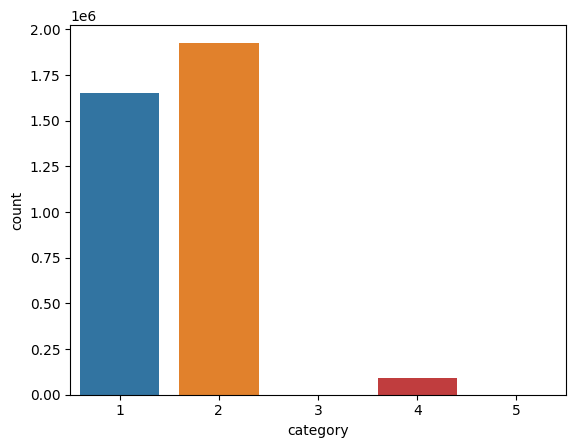

In [26]:
sns.countplot(x='category', data=df)
plt.show()

Ensemble Machine Learning algorithm

In [27]:
predictorNames = ['proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack']

In [28]:
predictors = df[predictorNames]

In [29]:
response = df['category']

In [30]:
scaler = StandardScaler()

In [31]:
X_train, X_val, y_train, y_val = train_test_split(predictors, response, test_size=0.2, random_state=42)

In [32]:
X_train = np.nan_to_num(X_train, nan=0.0, posinf=1e9, neginf=-1e9)
X_val = np.nan_to_num(X_val, nan=0.0, posinf=1e9, neginf=-1e9)

In [33]:
X_train = X_train.astype(np.float128)

In [34]:
X_val = X_val.astype(np.float128)

In [35]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [36]:
print(np.isnan(X_train).any())

False


In [37]:
print(np.isinf(X_train).any())

False


# Bootstrap Aggregation #

In [38]:
template = DecisionTreeClassifier(max_depth=5)

In [39]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)

In [ ]:
classificationEnsemble.fit(X_train, y_train)

In [ ]:
y_pred = classificationEnsemble.predict(X_val)

In [ ]:
Accuracy1 = accuracy_score(y_val, y_pred)

In [ ]:
print(Accuracy1*100)

In [ ]:
recall1 = recall_score(y_val, y_pred, pos_label=2)

In [ ]:
precision1 = precision_score(y_val, y_pred, pos_label=2)

In [ ]:
f11 = f1_score(y_val, y_pred, pos_label=2)

In [ ]:
print('Recall:', recall1*100)
print('Precision:', precision1*100)
print('F1 Score:', f11*100)

In [ ]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score']
scores = [Accuracy1,recall1, precision1,f11]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('Bootstrap Aggregation performance')

plt.show()

In [ ]:
cm = confusion_matrix(y_val, y_pred)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Bagging #

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [ ]:
bagging = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [ ]:
bagging.fit(X_train, y_train)

In [ ]:
y_pred2 =bagging.predict(X_val)

In [ ]:
Accuracy2 = accuracy_score(y_val, y_pred2)

In [ ]:
print(Accuracy2*100)

In [ ]:
cm2 = confusion_matrix(y_val, y_pred2)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', 
            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
recall2 = recall_score(y_val, y_pred2, pos_label='DDoS')
precision2 = precision_score(y_val, y_pred2, pos_label='DDoS')
f12 = f1_score(y_val, y_pred2, pos_label='DDoS')

In [ ]:
print('Recall:', recall2)
print('Precision:', precision2)
print('F1 Score:', f12)

In [ ]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score']
scores = [Accuracy2,recall2, precision2,f12]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('Bagging Trees performance')

plt.show()